In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.svm import SVC, LinearSVC
from data_clean import DataSelector

In [2]:
data=pd.read_csv('data/churn.csv')
train = pd.read_csv('data/churn_train.csv',parse_dates=['last_trip_date','signup_date'])
test = pd.read_csv('data/churn_test.csv',parse_dates=['last_trip_date','signup_date'])

In [3]:
train.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [5]:
# =======================================================================================
# Cleaning and selecting the data, for more info see class DataSelector in data_clean.py
# =======================================================================================

data = DataSelector()

X_train,y_train=data.clean_data_gradient_boost(train)
X_test,y_test=data.clean_data_gradient_boost(test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1dbf76d8>,
      dtype=object)

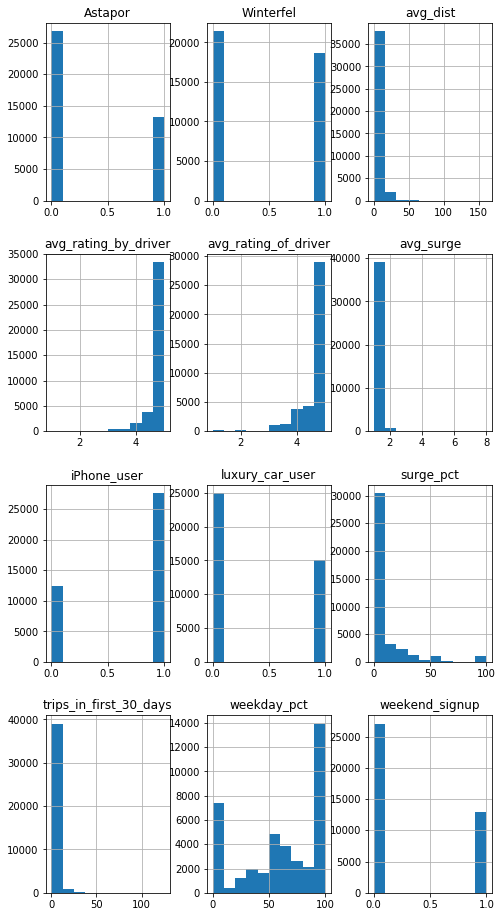

In [6]:
X_train.hist(figsize=(8,16))

In [7]:
X_train.corr()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,iPhone_user,Astapor,Winterfel,weekend_signup
avg_dist,1.000000,0.081532,0.054690,-0.079488,-0.102349,-0.135228,0.025824,0.097445,-0.023702,-0.044727,0.031272,-0.031105
avg_rating_by_driver,0.081532,1.000000,0.097104,0.008735,0.019527,-0.040150,0.009433,0.021037,-0.005771,0.034755,-0.099634,0.000221
avg_rating_of_driver,0.054690,0.097104,1.000000,-0.025667,-0.009313,-0.050758,-0.005225,0.006680,-0.038572,0.030813,-0.089681,-0.004743
avg_surge,-0.079488,0.008735,-0.025667,1.000000,0.793842,-0.001829,-0.075544,-0.113054,0.011530,0.036448,-0.028452,0.037962
surge_pct,-0.102349,0.019527,-0.009313,0.793842,1.000000,0.004746,-0.103531,-0.147969,0.013835,0.045647,-0.065744,0.055899
trips_in_first_30_days,-0.135228,-0.040150,-0.050758,-0.001829,0.004746,1.000000,0.114741,0.049731,0.056907,-0.058611,0.037260,-0.018516
luxury_car_user,0.025824,0.009433,-0.005225,-0.075544,-0.103531,0.114741,1.000000,0.033478,0.064507,0.022954,-0.053481,-0.011942
weekday_pct,0.097445,0.021037,0.006680,-0.113054,-0.147969,0.049731,0.033478,1.000000,0.005988,-0.013302,-0.012731,-0.282980
iPhone_user,-0.023702,-0.005771,-0.038572,0.011530,0.013835,0.056907,0.064507,0.005988,1.000000,-0.025071,-0.024163,-0.003712
Astapor,-0.044727,0.034755,0.030813,0.036448,0.045647,-0.058611,0.022954,-0.013302,-0.025071,1.000000,-0.656280,0.014479


In [8]:
#Grid search
gradient_boosting_grid = {'learning_rate': [0.005, 0.01, 0.02, 0.1],
                        'max_depth': [10],
                      'max_features': [1, 2, 3, 4, 5, 6],
                      'min_samples_leaf': [30, 50, 100],
                      'n_estimators': [100, 1000]}

gdbr_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gradient_boosting_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')

In [16]:
gdbr_gridsearch.fit(X_train, y_train)
print( "best parameters:", gdbr_gridsearch.best_params_ )
best_gdbr_model = gdbr_gridsearch.best_estimator_
gdbr_best=best_gdbr_model.fit(X_train, y_train)
gdbr_best.score(X_test,y_test)

/Users/agnesubelyte/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 57.6min finished


best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 100, 'n_estimators': 1000}


0.7812

In [9]:
# ============================================================
# Gradient Boosting Classifier (test accuracy score 0.7827)
# ============================================================

gdbr = GradientBoostingClassifier(learning_rate=0.01,
                                  max_depth=10,
                                  n_estimators=1000,
                                  min_samples_leaf=100,
                                  max_features=4)

In [10]:
gdbr.fit(X_train, y_train)
gdbr.score(X_test,y_test) 

0.7828

In [11]:
#Grid search returned max_features=2, but we achieved even better accuracy score with max_features=4. Let's look into it.

#Stage score plot
def stage_score_plot(estimator, X_train, y_train, X_test, y_test):
    
    mse_train = np.zeros(estimator.n_estimators)
    mse_test = np.zeros(estimator.n_estimators)
    estimator.fit(X_train,y_train)
    for ind, (yh_test,yh_train) in enumerate(zip(estimator.staged_predict(X_test),
                                                 estimator.staged_predict(X_train))):
        mse_test[ind]=np.sum(yh_test!=y_test)/len(y_test)
     
    plt.plot(np.r_[0:estimator.n_estimators],mse_test,
             label ='{} Max features {}'.format(estimator.__class__.__name__, estimator.max_features))
    plt.legend()

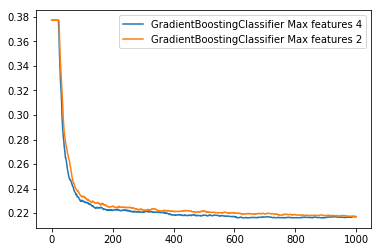

In [12]:
gb = GradientBoostingClassifier(learning_rate=0.01,max_depth=10,
                         n_estimators = 1000,min_samples_leaf=100, max_features = 4)
gb2 = GradientBoostingClassifier(learning_rate=0.01,max_depth=10,
                         n_estimators = 1000,min_samples_leaf=100, max_features = 2)
stage_score_plot(gb, X_train, y_train, X_test, y_test)
stage_score_plot(gb2, X_train, y_train, X_test, y_test)

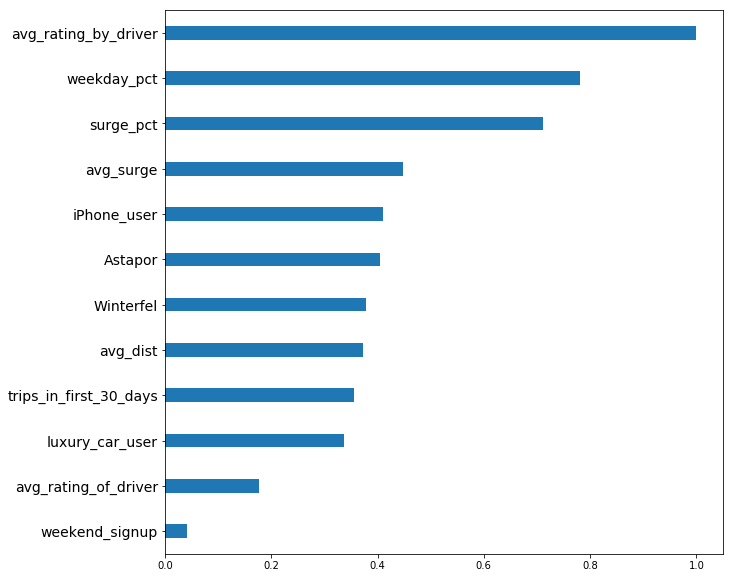

In [13]:
#Feature importances
top_cols = np.argsort(gdbr.feature_importances_)
importances =gdbr.feature_importances_[top_cols]
fig = plt.figure(figsize=(10, 10))
x_ind = np.arange(importances.shape[0])
plt.barh(x_ind, importances/importances[-1:], height=.3, align='center')
plt.ylim(x_ind.min() -0.5, x_ind.max() + 0.5)
plt.yticks(x_ind, X_test.columns[top_cols], fontsize=14)
plt.show()

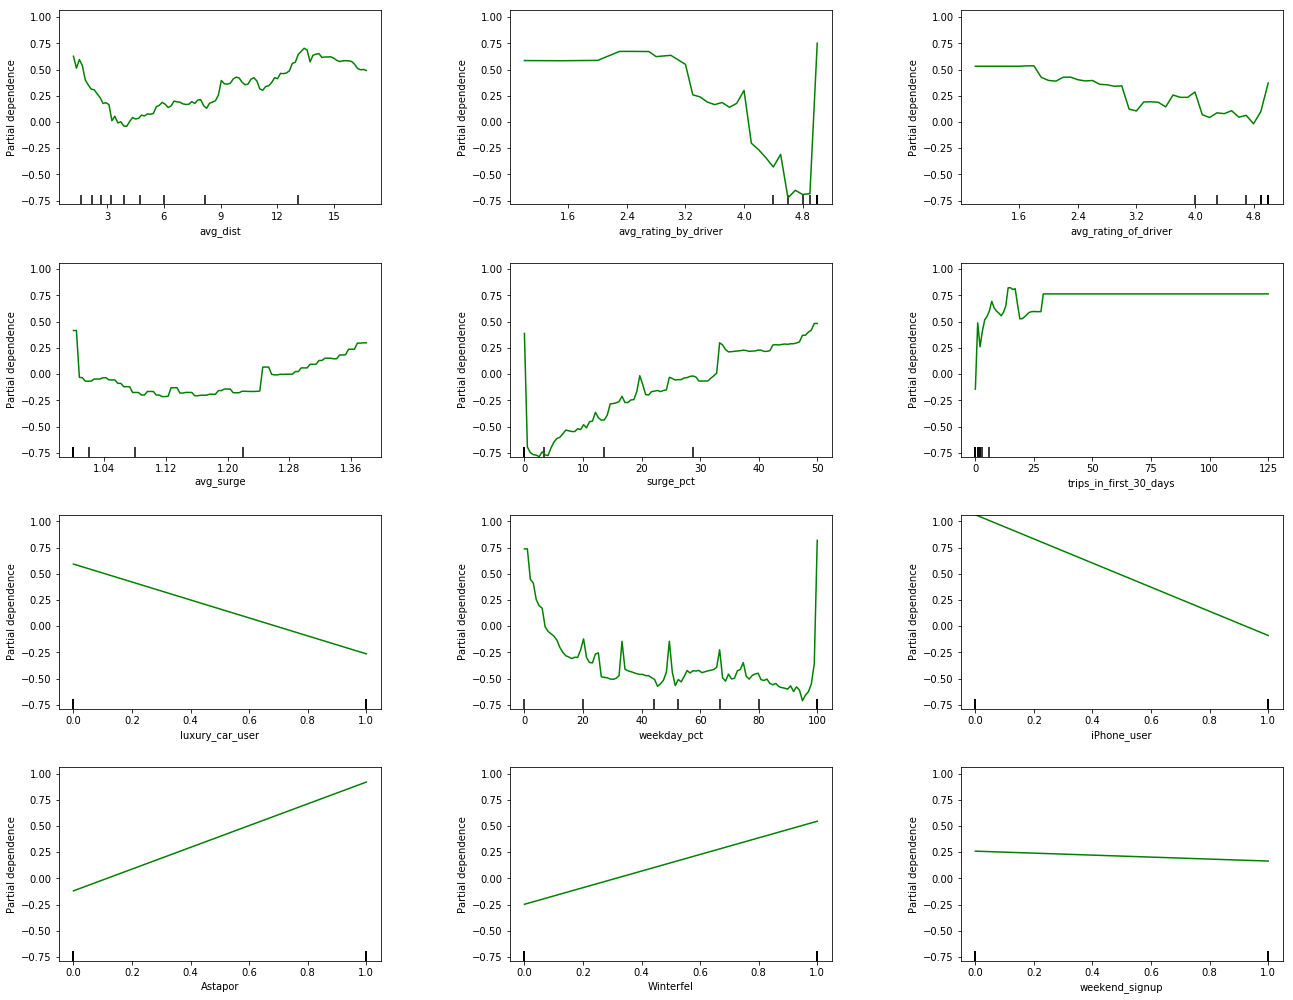

In [14]:
#Partial dependence plots
fig, axs = plot_partial_dependence(gdbr, X_train, np.arange(X_train.shape[1]),
                    n_jobs=3, grid_resolution=100,feature_names = X_train.columns)
fig.set_size_inches((20,24))

In [12]:
#Other models

In [18]:
#SVM
#Standardizing/Rescaling continuous variables
cont_vars=['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct',
    'avg_surge','trips_in_first_30_days', 'weekday_pct']
X_train[cont_vars]=StandardScaler().fit_transform(X_train[cont_vars])
X_test[cont_vars]=StandardScaler().fit_transform(X_test[cont_vars])

In [19]:
svm=SVC(kernel='linear',probability=True)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.6954

In [20]:
svm=SVC(kernel='poly',probability=True)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.745

In [21]:
svm=SVC(kernel='rbf',probability=True)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.7695

In [22]:
svm = SVC(gamma='scale') 
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.7697

In [23]:
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
#Random forest
rf = RandomForestClassifier(n_estimators=1000,
                            n_jobs=-1)

In [39]:
rf.fit(X_train, y_train)
rf.score(X_test,y_test) 

0.7521

In [40]:
#Adaptive boosting classifier
abr = AdaBoostClassifier(DecisionTreeClassifier(),
                         learning_rate=0.02,
                         n_estimators=1000)

In [41]:
abr.fit(X_train, y_train)
abr.score(X_test,y_test)

0.737

In [15]:
# =============================================================================
# Logistic regression (test accuracy score 0.7648)
# =============================================================================

data = DataSelector()

X_train_logit,y_train_logit=data.clean_data_logit(train)
X_test_logit,y_test_logit=data.clean_data_logit(test)

In [16]:
#Logistic classifier
#Sklearn
model = LogisticRegression(C=1000)
model.fit(X_train_logit, y_train_logit)

model.score(X_test_logit,y_test_logit)

0.7648

In [17]:
#Statsmodels
X_train_logit = sm.add_constant(X_train_logit)
logit = sm.Logit(y_train_logit, X_train_logit)
logit=logit.fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.484367
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39988
Method:                           MLE   Df Model:                           11
Date:                Fri, 01 Mar 2019   Pseudo R-squ.:                  0.2683
Time:                        22:47:29   Log-Likelihood:                -19375.
converged:                       True   LL-Null:                       -26479.
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.7637      0.048     36.596      0.000       1.669       1.858
luxury_car_user                -0.8373      0.026    -32.380      0.000      -0.888      -0.787
iPhone_user                    -1.0431      0.029    -35.710      0.000      -1.100      -0.986
Astapor                         1.9167      0.037     52.381      0.000       1.845       1.988
Winterfel                       1.3765      0.033     41.343      0.000       1.311       1.442
surge_above_zero_dummy         -0.6218      0.029    -21.680      0.000      -0.678      -0.566
rider_rtg_4_5                  -0.9128      0.028    -32.048      0.000      -0.969      -0.857
driver_rtg_4_5                 -0.2730      0.025    -10.743      0.000      -0.323      -0.223
weekday_pct_above0_below100    -0.0933      0.041     -2.273      0.023      -0.174      -0.013
weekday_pct_100                -1.1805      0.039    -29.959      0.000      -1.258      -1.103
avg_dist_above20miles           0.2918      0.086      3.378      0.001       0.122       0.461
first_30d_10or_more            -0.1971      0.064     -3.096      0.002      -0.322      -0.072
===============================================================================================
"""